<a href="https://colab.research.google.com/github/Krishna-Kumar-Sankaran-Kutty/PersonalFinanceUtils/blob/main/GetMFData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# prompt: now get the table rows and load into a pandas dafatrame

from bs4 import BeautifulSoup
import requests
import pandas as pd


# Send an HTTP GET request to the URL
url = 'https://www.moneycontrol.com/mutual-funds/hdfc-index-fund-nifty-50-plan-direct-plan/portfolio-holdings/MHD1152'
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table element
table = soup.find('table', id='equityCompleteHoldingTable')

# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
  data = [cell.text.strip() for cell in row.find_all('td')]
  rows.append(data)

# Create a Pandas DataFrame
df = pd.DataFrame(rows, columns=headers)

# Print the DataFrame
print(df.head())



             Stock Invested in                             Sector  \
0            #\nHDFC Bank Ltd.                Private sector bank   
1  #\nReliance Industries Ltd.             Refineries & marketing   
2           #\nICICI Bank Ltd.                Private sector bank   
3              #\nInfosys Ltd.  Computers - software & consulting   
4               #\nITC Limited                   Diversified fmcg   

  Sector Total Value(Mn) % of Total Holdings 1M Change 1Y Highest Holding  \
0        25.03   19413.9              11.02%     0.00%  14.07% (Jul 2023)   
1         9.84   16248.2               9.22%     0.00%  10.29% (Feb 2024)   
2        25.03   13636.4               7.74%     0.00%   8.11% (Apr 2024)   
3        13.73   10765.3               6.11%     0.00%   6.25% (Jan 2024)   
4         6.33    7300.4               4.14%     0.00%   4.69% (Jul 2023)   

   1Y Lowest Holding Quantity 1M Change in Qty      M-Cap GroupName  
0  10.98% (Feb 2024)  1.20 Cr           2.83 L      

In [20]:
# prompt: ake df as inout and remove #\n from Stock Invested in

df['Stock Invested in'] = df['Stock Invested in'].str.replace('#\n', '')

In [17]:
# Change '% of Total Holdings' to int
df['% of Total Holdings'] = df['% of Total Holdings'].str.rstrip('%').astype(float)

In [21]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stock Invested in    51 non-null     object 
 1   Sector               51 non-null     object 
 2   Sector Total         51 non-null     object 
 3   Value(Mn)            51 non-null     object 
 4   % of Total Holdings  51 non-null     float64
 5   1M Change            51 non-null     object 
 6   1Y Highest Holding   51 non-null     object 
 7   1Y Lowest Holding    51 non-null     object 
 8   Quantity             51 non-null     object 
 9   1M Change in Qty     51 non-null     object 
 10  M-Cap                51 non-null     object 
 11  GroupName            51 non-null     object 
dtypes: float64(1), object(11)
memory usage: 4.9+ KB


,% of Total Holdings
count,51.000000
mean,1.958235
std,2.227512
min,0.010000
25%,0.735000
50%,1.080000
75%,2.015000
max,11.020000


In [22]:
df

,Stock Invested in,Sector,Sector Total,Value(Mn),% of Total Holdings,1M Change,1Y Highest Holding,1Y Lowest Holding,Quantity,1M Change in Qty,M-Cap,GroupName
0,HDFC Bank Ltd.,Private sector bank,25.03,19413.9,11.02,0.00%,14.07% (Jul 2023),10.98% (Feb 2024),1.20 Cr,2.83 L,Other,14.48
1,Reliance Industries Ltd.,Refineries & marketing,9.84,16248.2,9.22,0.00%,10.29% (Feb 2024),9.12% (Nov 2023),53.97 L,1.27 L,Large Cap,82.13
2,ICICI Bank Ltd.,Private sector bank,25.03,13636.4,7.74,0.00%,8.11% (Apr 2024),7.36% (Dec 2023),1.12 Cr,2.64 L,Large Cap,82.13
3,Infosys Ltd.,Computers - software & consulting,13.73,10765.3,6.11,0.00%,6.25% (Jan 2024),5.06% (May 2024),57.62 L,1.36 L,Large Cap,82.13
4,ITC Limited,Diversified fmcg,6.33,7300.4,4.14,0.00%,4.69% (Jul 2023),3.69% (Jun 2024),1.47 Cr,3.47 L,Large Cap,82.13
5,Larsen & Toubro Ltd.,Civil construction,4.04,7112,4.04,0.00%,4.53% (Mar 2024),3.7% (Jul 2023),18.64 L,43.90 k,Large Cap,82.13
6,Tata Consultancy Services Ltd.,Computers - software & consulting,13.73,7087.1,4.02,0.00%,4.32% (Feb 2024),3.71% (Jun 2024),16.16 L,38.06 k,Large Cap,82.13
7,Bharti Airtel Ltd.,Telecom - cellular & fixed line services,3.61,6364.2,3.61,0.00%,3.63% (Jun 2024),2.52% (Aug 2023),42.67 L,1.00 L,Large Cap,82.13
8,State Bank Of India,Public sector bank,3.03,5340.7,3.03,0.00%,3.21% (May 2024),2.46% (Nov 2023),61.22 L,1.44 L,Large Cap,82.13
9,Axis Bank Ltd.,Private sector bank,25.03,5288.3,3.00,0.00%,3.38% (Nov 2023),2.98% (Jul 2023),45.35 L,1.07 L,Large Cap,82.13


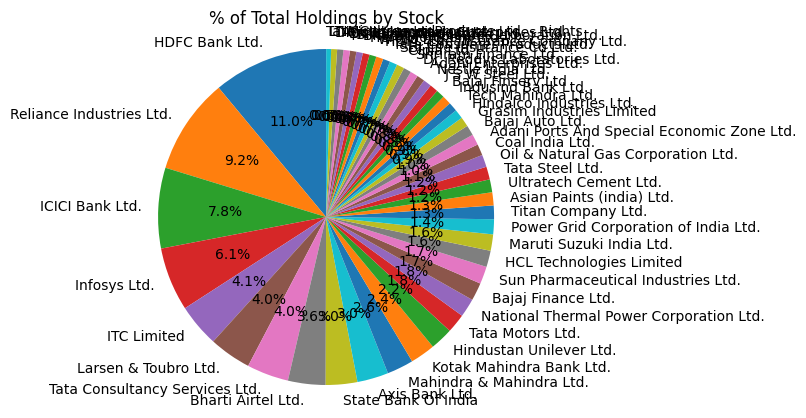

In [26]:
# prompt: create a pie chart of % of Total Holdings and Stock Invested in

import matplotlib.pyplot as plt

# Creating the pie chart
plt.pie(df['% of Total Holdings'], labels=df['Stock Invested in'], autopct='%1.1f%%', startangle=90)

# Adding a title to the chart
plt.title('% of Total Holdings by Stock')

# Ensuring the circle's proportion
plt.axis('equal')

# Displaying the chart
plt.show()
